# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=498d2ca43d42d2d12a59be4be9d74a54&units=metric&q=


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York","Vaitupu" ,"Seattle", "Dallas", "Taipei"]
# set up lists to hold reponse info
lat = []
lon = []
mtem = []
hum = []
clo = []
win = []
cou = []
dat = []
cit=[]
i=1
print("Beginning data Retrieval")
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        mtem.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        clo.append(response['clouds']['all'])
        win.append(response['wind']['speed'])
        cou.append(response['sys']['country'])
        dat.append(datetime.utcfromtimestamp(response['dt']).strftime('%Y-%m-%d %H:%M:%S'))
        cit.append(response['name'])
        print("Processing Record", i ," ", city)
        i=i+1
    except KeyError:
        print("City not found. Skipping", i,city)

Beginning data Retrieval
Processing Record 1   port lincoln
Processing Record 2   altoona
Processing Record 3   bambous virieux
Processing Record 4   buenaventura
Processing Record 5   matara
Processing Record 6   yellowknife
Processing Record 7   soma
City not found. Skipping 8 mys shmidta
Processing Record 8   chokurdakh
City not found. Skipping 9 belushya guba
Processing Record 9   hermanus
Processing Record 10   samarai
Processing Record 11   kudahuvadhoo
Processing Record 12   buraydah
Processing Record 13   puerto ayora
City not found. Skipping 14 barentsburg
Processing Record 14   mataura
Processing Record 15   nikolskoye
Processing Record 16   crawley
Processing Record 17   pucara
Processing Record 18   kinablangan
Processing Record 19   jamestown
Processing Record 20   praia da vitoria
City not found. Skipping 21 tsihombe
Processing Record 21   vaini
Processing Record 22   rikitea
City not found. Skipping 23 nizhneyansk
Processing Record 23   lompoc
Processing Record 24   ilul

City not found. Skipping 231 umm durman
Processing Record 231   butaritari
Processing Record 232   nome
Processing Record 233   santa cruz del norte
Processing Record 234   ankang
Processing Record 235   illapel
Processing Record 236   kangaatsiaq
Processing Record 237   esperance
City not found. Skipping 238 afanasyevo
Processing Record 238   dejen
Processing Record 239   correntina
Processing Record 240   thai binh
City not found. Skipping 241 marcona
Processing Record 241   rio pardo
Processing Record 242   kirakira
Processing Record 243   magistralnyy
Processing Record 244   garowe
Processing Record 245   buenos aires
City not found. Skipping 246 tumannyy
Processing Record 246   road town
Processing Record 247   bandarbeyla
Processing Record 248   dikson
Processing Record 249   coxim
Processing Record 250   kyra
Processing Record 251   zhezkazgan
Processing Record 252   the valley
Processing Record 253   faanui
Processing Record 254   xining
Processing Record 255   lucea
Processing

Processing Record 456   shenjiamen
City not found. Skipping 457 ust-kamchatsk
Processing Record 457   aklavik
Processing Record 458   pahrump
Processing Record 459   roald
Processing Record 460   dzilam gonzalez
Processing Record 461   koslan
Processing Record 462   uruguaiana
Processing Record 463   cockburn town
Processing Record 464   guerrero negro
Processing Record 465   komsomolskiy
City not found. Skipping 466 vaitupu
Processing Record 466   oudtshoorn
Processing Record 467   jalu
Processing Record 468   vila
Processing Record 469   cairns
Processing Record 470   nouakchott
City not found. Skipping 471 bur gabo
Processing Record 471   martos
Processing Record 472   minab
Processing Record 473   sakakah
Processing Record 474   robertsport
City not found. Skipping 475 palabuhanratu
Processing Record 475   andenes
Processing Record 476   yasnogorsk
Processing Record 477   saint-joseph
Processing Record 478   lerwick
Processing Record 479   khomeyn
Processing Record 480   mwanza
Pro

In [9]:
print(len(cit))

575


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# create a data frame from cities, lat, and temp
cities_dict = {
    "City": cit,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": mtem,
    "Humidity": hum,
    "Cloudiness": clo,
    "Wind Speed": win,
    "Country": cou,
    "Date": dat
}
cities_data = pd.DataFrame(cities_dict)
cities_data.to_csv("Output/cities_weather.csv", index=False)
cities_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Lincoln,-34.7333,135.8667,17.63,64,95,5.60,AU,2021-02-07 02:47:11
1,Altoona,40.5187,-78.3947,-5.56,68,83,0.84,US,2021-02-07 02:48:54
2,Bambous Virieux,-20.3428,57.7575,25.00,88,40,2.57,MU,2021-02-07 02:51:25
3,Buenaventura,3.8801,-77.0312,20.00,73,100,1.24,CO,2021-02-07 02:51:25
4,Matara,5.9485,80.5353,26.02,81,35,1.48,LK,2021-02-07 02:51:25
...,...,...,...,...,...,...,...,...,...
570,Cayenne,4.9333,-52.3333,25.00,100,75,1.54,GF,2021-02-07 02:52:53
571,Visby,57.6409,18.2960,-3.00,80,90,3.09,SE,2021-02-07 02:50:18
572,Calamar,10.2511,-74.9146,27.00,78,0,3.09,CO,2021-02-07 02:52:53
573,Doka,13.5167,35.7667,14.60,41,1,5.19,SD,2021-02-07 02:52:53


In [11]:
#display stadistics summary
cities_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,19.693064,18.187715,9.768539,74.074783,52.669565,3.598243
std,32.770408,88.729672,17.694275,18.772978,40.096165,2.696922
min,-54.800000,-175.200000,-41.250000,18.000000,0.000000,0.240000
25%,-5.941700,-56.506400,-0.225000,65.000000,6.000000,1.540000
50%,22.075200,22.636700,16.000000,79.000000,61.000000,2.910000
75%,47.735450,91.729300,24.000000,88.000000,92.000000,4.725000
max,78.218600,179.316700,33.000000,100.000000,100.000000,16.960000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
clean_city_data=cities_data.loc[cities_data['Humidity']<=100]
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Lincoln,-34.7333,135.8667,17.63,64,95,5.60,AU,2021-02-07 02:47:11
1,Altoona,40.5187,-78.3947,-5.56,68,83,0.84,US,2021-02-07 02:48:54
2,Bambous Virieux,-20.3428,57.7575,25.00,88,40,2.57,MU,2021-02-07 02:51:25
3,Buenaventura,3.8801,-77.0312,20.00,73,100,1.24,CO,2021-02-07 02:51:25
4,Matara,5.9485,80.5353,26.02,81,35,1.48,LK,2021-02-07 02:51:25


In [12]:
#  Get the indices of cities that have humidity over 100%.
#over100=[]
#over100 = next(iter((cities_data['Humidity']>=100).index), 'no match')

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
col_hum = clean_city_data['Humidity']
outliers = col_hum.between(col_hum.quantile(.05), col_hum.quantile(.95))
hum_to_drop = clean_city_data[~outliers].index
print(str(len(hum_to_drop)) + " data drop of " + str(len(clean_city_data)) + " total cities.") 
clean_city_data=clean_city_data.drop(hum_to_drop)
clean_city_data

57 data drop of 575 total cities.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Lincoln,-34.7333,135.8667,17.63,64,95,5.60,AU,2021-02-07 02:47:11
1,Altoona,40.5187,-78.3947,-5.56,68,83,0.84,US,2021-02-07 02:48:54
2,Bambous Virieux,-20.3428,57.7575,25.00,88,40,2.57,MU,2021-02-07 02:51:25
3,Buenaventura,3.8801,-77.0312,20.00,73,100,1.24,CO,2021-02-07 02:51:25
4,Matara,5.9485,80.5353,26.02,81,35,1.48,LK,2021-02-07 02:51:25
...,...,...,...,...,...,...,...,...,...
569,Camacha,33.0833,-16.3333,15.00,72,40,4.63,PT,2021-02-07 02:52:52
571,Visby,57.6409,18.2960,-3.00,80,90,3.09,SE,2021-02-07 02:50:18
572,Calamar,10.2511,-74.9146,27.00,78,0,3.09,CO,2021-02-07 02:52:53
573,Doka,13.5167,35.7667,14.60,41,1,5.19,SD,2021-02-07 02:52:53


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

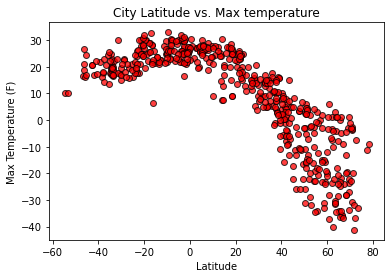

In [14]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("Images/latvsmmaxtemp.png")
plt.show()

## Latitude vs. Humidity Plot

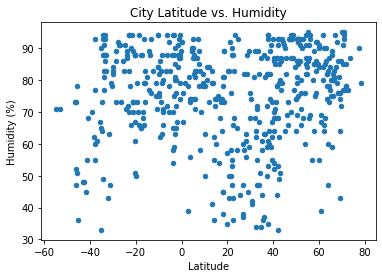

In [15]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", title="City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("Images/latvshum.png")
plt.show()

## Latitude vs. Cloudiness Plot

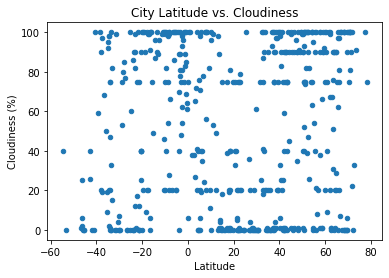

In [16]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", title="City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("Images/latvsclou.png")
plt.show()

## Latitude vs. Wind Speed Plot

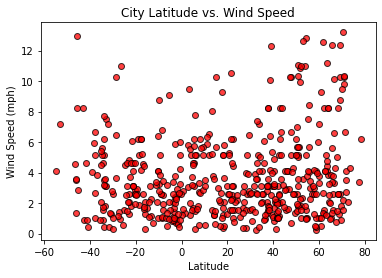

In [17]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("Images/latvswin.png")
plt.show()

## Linear Regression

In [18]:
northern_hemi_data=clean_city_data.loc[clean_city_data['Lat']>=0]
northern_hemi_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Altoona,40.5187,-78.3947,-5.56,68,83,0.84,US,2021-02-07 02:48:54
3,Buenaventura,3.8801,-77.0312,20.00,73,100,1.24,CO,2021-02-07 02:51:25
4,Matara,5.9485,80.5353,26.02,81,35,1.48,LK,2021-02-07 02:51:25
5,Yellowknife,62.4560,-114.3525,-40.00,66,1,1.54,CA,2021-02-07 02:51:06
7,Chokurdakh,70.6333,147.9167,-30.68,85,81,2.22,RU,2021-02-07 02:51:26
...,...,...,...,...,...,...,...,...,...
567,Port-Cartier,50.0334,-66.8654,-3.00,74,99,5.14,CA,2021-02-07 02:52:52
569,Camacha,33.0833,-16.3333,15.00,72,40,4.63,PT,2021-02-07 02:52:52
571,Visby,57.6409,18.2960,-3.00,80,90,3.09,SE,2021-02-07 02:50:18
572,Calamar,10.2511,-74.9146,27.00,78,0,3.09,CO,2021-02-07 02:52:53


In [19]:
southern_hemi_data=clean_city_data.loc[clean_city_data['Lat']<0]
southern_hemi_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Lincoln,-34.7333,135.8667,17.63,64,95,5.60,AU,2021-02-07 02:47:11
2,Bambous Virieux,-20.3428,57.7575,25.00,88,40,2.57,MU,2021-02-07 02:51:25
8,Hermanus,-34.4187,19.2345,19.44,94,98,0.89,ZA,2021-02-07 02:51:26
9,Samarai,-10.6167,150.6667,29.85,71,46,2.10,PG,2021-02-07 02:46:51
12,Puerto Ayora,-0.7393,-90.3518,25.00,94,69,3.23,EC,2021-02-07 02:51:27
...,...,...,...,...,...,...,...,...,...
561,Fougamou,-1.2154,10.5838,23.00,93,100,0.40,GA,2021-02-07 02:52:51
565,Carutapera,-1.1950,-46.0200,25.38,87,89,2.64,BR,2021-02-07 02:52:52
566,Prado,-17.3411,-39.2208,25.50,88,99,5.25,BR,2021-02-07 02:52:52
568,Pozo Colorado,-23.4923,-58.7972,19.60,72,0,2.06,PY,2021-02-07 02:52:52


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7297084761806559


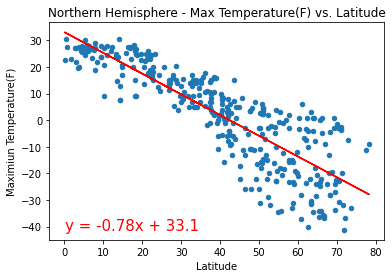

In [20]:
northern_hemi_data.plot(kind="scatter", x="Lat", y="Max Temp", title="Northern Hemisphere - Max Temperature(F) vs. Latitude")
# Add the linear regression equation and line to plot
x_values = northern_hemi_data['Lat']
y_values = northern_hemi_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#take values to print the line eq
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/norlatvsmaxtem.png")
plt.ylabel("Maximiun Temperature(F)")
plt.xlabel("Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.34700122646136394


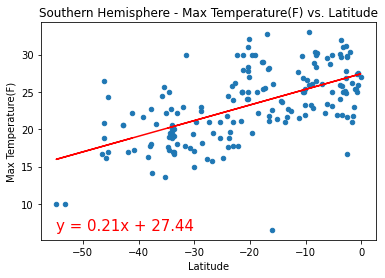

In [21]:
southern_hemi_data.plot(kind="scatter", x="Lat", y="Max Temp", title="Southern Hemisphere - Max Temperature(F) vs. Latitude")
# Add the linear regression equation and line to plot
x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/soulatvsmaxtem.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05326528543088912


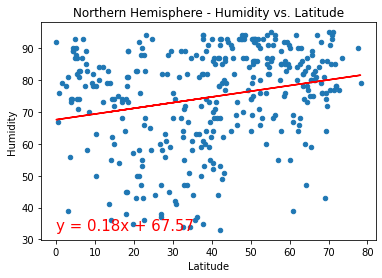

In [22]:
northern_hemi_data.plot(kind="scatter", x="Lat", y="Humidity", title="Northern Hemisphere - Humidity vs. Latitude")
# Add the linear regression equation and line to plot
x_values = northern_hemi_data['Lat']
y_values = northern_hemi_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#take values to print the line eq
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/norlatvshum.png")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08857607289472956


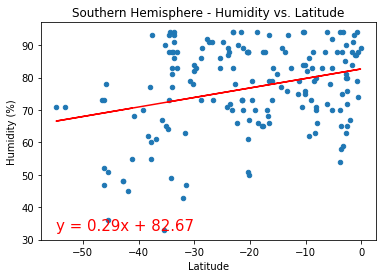

In [23]:
southern_hemi_data.plot(kind="scatter", x="Lat", y="Humidity", title="Southern Hemisphere - Humidity vs. Latitude")
# Add the linear regression equation and line to plot
x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/soulatvshum.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05692541417047076


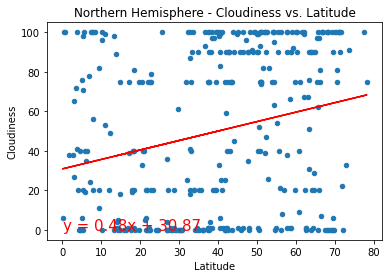

In [24]:
northern_hemi_data.plot(kind="scatter", x="Lat", y="Cloudiness", title="Northern Hemisphere - Cloudiness vs. Latitude")

# Add the linear regression equation and line to plot
x_values = northern_hemi_data['Lat']
y_values = northern_hemi_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/norlatvsclou.png")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19929252612138182


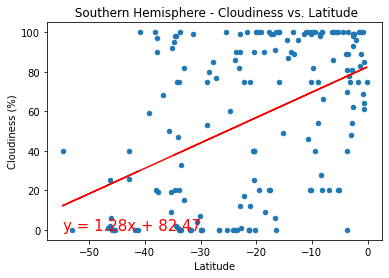

In [25]:
southern_hemi_data.plot(kind="scatter", x="Lat", y="Cloudiness", title=" Southern Hemisphere - Cloudiness vs. Latitude")

# Add the linear regression equation and line to plot
x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/soulatvsclou.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02628887318180688


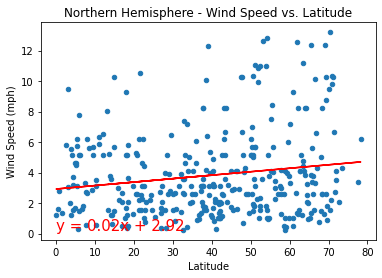

In [26]:
northern_hemi_data.plot(kind="scatter", x="Lat", y="Wind Speed", title="Northern Hemisphere - Wind Speed vs. Latitude")
# Add the linear regression equation and line to plot
x_values = northern_hemi_data['Lat']
y_values = northern_hemi_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/norlatvswin.png")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07284696965501317


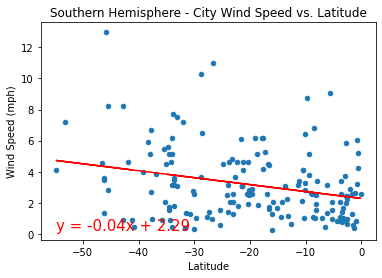

In [27]:
southern_hemi_data.plot(kind="scatter", x="Lat", y="Wind Speed", title="Southern Hemisphere - City Wind Speed vs. Latitude")
# Add the linear regression equation and line to plot
x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/soulatvswin.png")
plt.show()